In [1]:
!pip install corner

Importamos cada librería

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import corner as c
import pandas as pd

from sklearn.preprocessing import StandardScaler as ss
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Leemos y almacenamos en data los datos descargados

In [3]:
data = pd.read_csv('Cars93.csv')

In [4]:
data

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,Front,5,2.5,109,4500,2915,Yes,21.1,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,Front,4,2.0,134,5800,2685,Yes,18.5,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,6,2.8,178,5800,2385,Yes,18.5,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,4,2.3,114,5400,2215,Yes,15.8,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [5]:
data.isnull().sum()

Unnamed: 0             0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

Vemos entonces a continuación, las variables

In [6]:
data.keys()

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

Como se puede ver, se tiene información sobre diferentes elementos de los vehículos que se quieren analizar con el fin de determinar cuáles son los más determinantes en el precio

Cambio en Manufacturer:
Acura = 1
Audi = 2
BMW = 3
Buick = 4
Cadillac = 5
Chevrolet = 6
Chrylser = 7
Dodge = 8
Eagle = 9
Ford = 10
Geo = 11
Honda = 12
Hyundai = 13
Infiniti = 14
Lexus = 15
Lincoln =16
Mazda = 17
Mercedes-Benz= 18
Mercury = 19
Mitusbishi =20
Nissan = 21
Oldsmobile =22
Plymouth =23
Pontiac =24
Saab = 25
Saturn= 26
Subaru = 27
Suzuki = 28
Toyota =29
Volkswagen = 30
Volvo = 31

In [7]:
data.replace(to_replace ="Acura",         value = 1,  inplace = True)
data.replace(to_replace ="Audi" ,     value = 2,  inplace = True)
data.replace(to_replace ="BMW"  ,     value = 3,  inplace = True)
data.replace(to_replace ="Buick",     value = 4,  inplace = True)
data.replace(to_replace ="Cadillac",  value = 5,  inplace = True)
data.replace(to_replace ="Chevrolet", value = 6,  inplace = True)
# En el archivo .csv hay un Chrysler mal escrito. Se corrige asignando el mismo número que el que está bien escrito. 
data.replace(to_replace ="Chrylser",  value = 7,  inplace = True)
data.replace(to_replace ="Chrysler",  value = 7,  inplace = True)
data.replace(to_replace ="Dodge",     value = 8,  inplace = True)
data.replace(to_replace ="Eagle",     value = 9,  inplace = True)
data.replace(to_replace ="Ford",      value = 10,  inplace = True)
data.replace(to_replace ="Geo",       value = 11,  inplace = True)
data.replace(to_replace ="Honda",     value = 12,  inplace = True)
data.replace(to_replace ="Hyundai",   value = 13,  inplace = True)
data.replace(to_replace ="Infiniti",  value = 14,  inplace = True)
data.replace(to_replace ="Lexus",     value = 15,  inplace = True)
data.replace(to_replace ="Lincoln",        value = 16,  inplace = True)
data.replace(to_replace ="Mazda",          value = 17,  inplace = True)
data.replace(to_replace ="Mercedes-Benz",  value = 18,  inplace = True)
data.replace(to_replace ="Mercury",        value = 19,  inplace = True)
data.replace(to_replace ="Mitsubishi",     value = 20,  inplace = True)
data.replace(to_replace ="Nissan",         value = 21,  inplace = True)
data.replace(to_replace ="Oldsmobile",     value = 22,  inplace = True)
data.replace(to_replace ="Plymouth",       value = 23,  inplace = True)
data.replace(to_replace ="Pontiac",        value = 24,  inplace = True)
data.replace(to_replace ="Saab",           value = 25,  inplace = True)
data.replace(to_replace ="Saturn",         value = 26,  inplace = True)
data.replace(to_replace ="Subaru",         value = 27,  inplace = True)
data.replace(to_replace ="Suzuki",         value = 28,  inplace = True)
data.replace(to_replace ="Toyota",         value = 29,  inplace = True)
data.replace(to_replace ="Volkswagen",     value = 30,  inplace = True)
data.replace(to_replace ="Volvo",          value = 31,  inplace = True)

Cambio en Type: Small = 1, Midsize = 2, Compact = 3 , Large = 4, Sporty = 5, Van = 6

In [8]:
data.replace(to_replace ="Small",        value = 1,  inplace = True)
data.replace(to_replace ="Midsize" ,     value = 2,  inplace = True)
data.replace(to_replace ="Compact"  ,    value = 3,  inplace = True)
data.replace(to_replace ="Large",        value = 4,  inplace = True)
data.replace(to_replace ="Sporty",       value = 5,  inplace = True)
data.replace(to_replace ="Van",          value = 6,  inplace = True)

Cambio en Airbags: None = 1 , Drive & Passenger = 2, Driver Only = 3

In [9]:
data.replace(to_replace ="None",                    value = 1,  inplace = True)
data.replace(to_replace ="Driver & Passenger" ,     value = 2,  inplace = True)
data.replace(to_replace ="Driver only"  ,           value = 3,  inplace = True)

Cambio en el Modelo. Como los modelos son diferentes para cada vehículo, se asignan los números en sucesión.

In [10]:
data.replace(to_replace ="Integra",         value = 1,  inplace = True)
data.replace(to_replace ="Legend" ,         value = 2,  inplace = True)
data.replace(to_replace ="90"  ,            value = 3,  inplace = True)
data.replace(to_replace ="100",             value = 4,  inplace = True)
data.replace(to_replace ="535i",            value = 5,  inplace = True)
data.replace(to_replace ="Century",         value = 6,  inplace = True)
data.replace(to_replace ="LeSabre",         value = 7,  inplace = True)
data.replace(to_replace ="Roadmaster",      value = 8,  inplace = True)
data.replace(to_replace ="Riviera",         value = 9,  inplace = True)
data.replace(to_replace ="DeVille",         value = 11,  inplace = True)
data.replace(to_replace ="Seville",         value = 12,  inplace = True)
data.replace(to_replace ="Cavalier",        value = 13,  inplace = True)
data.replace(to_replace ="Corsica",         value = 14,  inplace = True)
data.replace(to_replace ="Camaro",          value = 15,  inplace = True)
data.replace(to_replace ="Lumina",          value = 16,  inplace = True)
data.replace(to_replace ="Lumina_APV",      value = 17,  inplace = True)
data.replace(to_replace ="Astro",           value = 18,  inplace = True)
data.replace(to_replace ="Caprice",         value = 19,  inplace = True)
data.replace(to_replace ="Corvette",        value = 20,  inplace = True)
data.replace(to_replace ="Concorde",        value = 21,  inplace = True)
data.replace(to_replace ="LeBaron",         value = 22,  inplace = True)
data.replace(to_replace ="Imperial",        value = 23,  inplace = True)
data.replace(to_replace ="Colt",            value = 24,  inplace = True)
data.replace(to_replace ="Shadow",          value = 25,  inplace = True)
data.replace(to_replace ="Spirit",          value = 26,  inplace = True)
data.replace(to_replace ="Caravan",         value = 27,  inplace = True)
data.replace(to_replace ="Dynasty",         value = 28,  inplace = True)
data.replace(to_replace ="Stealth",         value = 29,  inplace = True)
data.replace(to_replace ="Summit",          value = 30,  inplace = True)
data.replace(to_replace ="Vision",          value = 31,  inplace = True)
data.replace(to_replace ="Festiva",         value = 32,  inplace = True)
data.replace(to_replace ="Escort",          value = 33,  inplace = True)
data.replace(to_replace ="Tempo",           value = 34,  inplace = True)
data.replace(to_replace ="Mustang",         value = 35,  inplace = True)
data.replace(to_replace ="Probe",           value = 36,  inplace = True)
data.replace(to_replace ="Aerostar",        value = 37,  inplace = True)
data.replace(to_replace ="Taurus",          value = 38,  inplace = True)
data.replace(to_replace ="Crown_Victoria",  value = 39,  inplace = True)
data.replace(to_replace ="Metro",           value = 40,  inplace = True)
data.replace(to_replace ="Storm",           value = 41,  inplace = True)
data.replace(to_replace ="Prelude",         value = 42,  inplace = True)
data.replace(to_replace ="Civic",           value = 43,  inplace = True)
data.replace(to_replace ="Accord",          value = 44,  inplace = True)
data.replace(to_replace ="Excel",           value = 45,  inplace = True)
data.replace(to_replace ="Elantra",         value = 46,  inplace = True)
data.replace(to_replace ="Scoupe",          value = 47,  inplace = True)
data.replace(to_replace ="Sonata",          value = 48,  inplace = True)
data.replace(to_replace ="Q45",             value = 49,  inplace = True)
data.replace(to_replace ="ES300",           value = 50,  inplace = True)
data.replace(to_replace ="SC300",           value = 51,  inplace = True)
data.replace(to_replace ="Continental",     value = 52,  inplace = True)
data.replace(to_replace ="Town_Car",        value = 53,  inplace = True)
data.replace(to_replace ="323",             value = 54,  inplace = True)
data.replace(to_replace ="Protege",         value = 55,  inplace = True)
data.replace(to_replace ="626",             value = 56,  inplace = True)
data.replace(to_replace ="MPV",             value = 57,  inplace = True)
data.replace(to_replace ="RX-7",            value = 58,  inplace = True)
data.replace(to_replace ="190E",            value = 59,  inplace = True)
data.replace(to_replace ="300E",            value = 60,  inplace = True)
data.replace(to_replace ="Capri",           value = 61,  inplace = True)
data.replace(to_replace ="Cougar",          value = 62,  inplace = True)
data.replace(to_replace ="Mirage",          value = 63,  inplace = True)
data.replace(to_replace ="Diamante",        value = 64,  inplace = True)
data.replace(to_replace ="Sentra",          value = 65,  inplace = True)
data.replace(to_replace ="Altima",          value = 66,  inplace = True)
data.replace(to_replace ="Quest",           value = 67,  inplace = True)
data.replace(to_replace ="Maxima",          value = 68,  inplace = True)
data.replace(to_replace ="Achieva",         value = 69,  inplace = True)
data.replace(to_replace ="Cutlass_Ciera",   value = 70,  inplace = True)
data.replace(to_replace ="Silhouette",      value = 71,  inplace = True)
data.replace(to_replace ="Eighty-Eight",    value = 72,  inplace = True)
data.replace(to_replace ="Laser",           value = 73,  inplace = True)
data.replace(to_replace ="LeMans",          value = 74,  inplace = True)
data.replace(to_replace ="Sunbird",         value = 75,  inplace = True)
data.replace(to_replace ="Firebird",        value = 76,  inplace = True)
data.replace(to_replace ="Grand_Prix",      value = 77,  inplace = True)
data.replace(to_replace ="Bonneville",      value = 78,  inplace = True)
data.replace(to_replace ="900",             value = 79,  inplace = True)
data.replace(to_replace ="SL",              value = 80,  inplace = True)
data.replace(to_replace ="Justy",           value = 81,  inplace = True)
data.replace(to_replace ="Loyale",          value = 82,  inplace = True)
data.replace(to_replace ="Legacy",          value = 83,  inplace = True)
data.replace(to_replace ="Swift",           value = 84,  inplace = True)
data.replace(to_replace ="Tercel",          value = 85,  inplace = True)
data.replace(to_replace ="Celica",          value = 86,  inplace = True)
data.replace(to_replace ="Camry",           value = 87,  inplace = True)
data.replace(to_replace ="Previa",          value = 88,  inplace = True)
data.replace(to_replace ="Fox",             value = 89,  inplace = True)
data.replace(to_replace ="Eurovan",         value = 90,  inplace = True)
data.replace(to_replace ="Passat",          value = 91,  inplace = True)
data.replace(to_replace ="Corrado",         value = 92,  inplace = True)
data.replace(to_replace ="240",             value = 93,  inplace = True)
data.replace(to_replace ="850",             value = 94,  inplace = True)



Cambio en Drive Train: Front = 1 , Rear= 2, 4WD = 3 , rotary =4

In [11]:
data.replace(to_replace ="Front",            value = 1,  inplace = True)
data.replace(to_replace ="Rear",             value = 2,  inplace = True)
data.replace(to_replace ="4WD",              value = 3,  inplace = True)

Cambio en Cylinders

In [12]:
data.replace(to_replace ="rotary",              value = "2",  inplace = True)

Cambio en Man. trans. avail. : Yes = 1 , No=2

In [13]:
data.replace(to_replace ="Yes",            value = 1,  inplace = True)
data.replace(to_replace ="No",             value = 2,  inplace = True)

Cambio en Origin: non-USA = 1 , USA = 2

In [14]:
data.replace(to_replace ="non-USA",         value = 1,  inplace = True)
data.replace(to_replace ="USA",             value = 2,  inplace = True)

Así, los datos en String que se encontraban en el .csv se pasan a cuantitativos para poder buscar las correlaciones correspondientes.

In [15]:
data

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,1,1,1,12.9,15.9,18.8,25,31,1,1,4,1.8,140,6300,2890,1,13.2,5,177,102,68,37,26.5,11.0,2705,1,Acura Integra
1,2,1,2,2,29.2,33.9,38.7,18,25,2,1,6,3.2,200,5500,2335,1,18.0,5,195,115,71,38,30.0,15.0,3560,1,Acura Legend
2,3,2,3,3,25.9,29.1,32.3,20,26,3,1,6,2.8,172,5500,2280,1,16.9,5,180,102,67,37,28.0,14.0,3375,1,Audi 90
3,4,2,4,2,30.8,37.7,44.6,19,26,2,1,6,2.8,172,5500,2535,1,21.1,6,193,106,70,37,31.0,17.0,3405,1,Audi 100
4,5,3,5,2,23.7,30.0,36.2,22,30,3,2,4,3.5,208,5700,2545,1,21.1,4,186,109,69,39,27.0,13.0,3640,1,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,30,90,6,16.6,19.7,22.7,17,21,1,1,5,2.5,109,4500,2915,1,21.1,7,187,115,72,38,34.0,NaN,3960,1,Volkswagen Eurovan
89,90,30,91,3,17.6,20.0,22.4,21,30,1,1,4,2.0,134,5800,2685,1,18.5,5,180,103,67,35,31.5,14.0,2985,1,Volkswagen Passat
90,91,30,92,5,22.9,23.3,23.7,18,25,1,1,6,2.8,178,5800,2385,1,18.5,4,159,97,66,36,26.0,15.0,2810,1,Volkswagen Corrado
91,92,31,93,3,21.8,22.7,23.5,21,28,3,2,4,2.3,114,5400,2215,1,15.8,5,190,104,67,37,29.5,14.0,2985,1,Volvo 240


Ahora, tenemos entonces que,

In [16]:
keys = ['Manufacturer', 'Model', 'Type', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle',
       'Weight', 'Origin']
y = ['Price']

Miremos, por ejemplo, el histograma correspondiente a los airbags

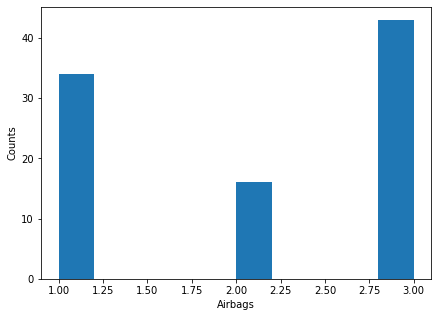

In [17]:
fig = plt.figure(figsize=(7,5))
plt.hist(data['AirBags'])
plt.xlabel('Airbags')
plt.ylabel('Counts')
plt.show()

Hacemos ahora lo aprendido con respecto a la clasificación visual con el fin de poder ver la relevancia de cada una de las variables selectas en función de la función objetivo, la cual es el precio del carro.

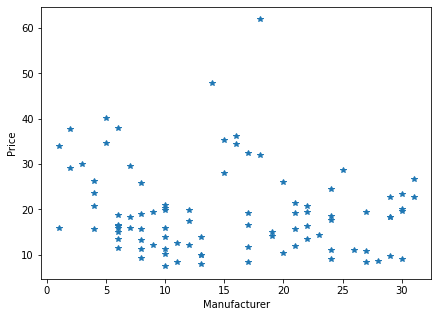

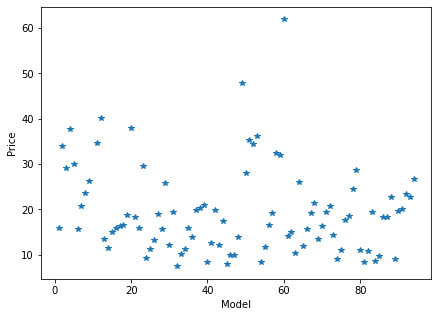

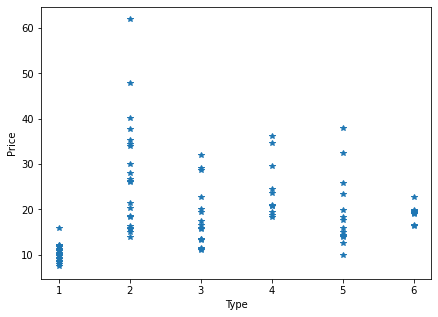

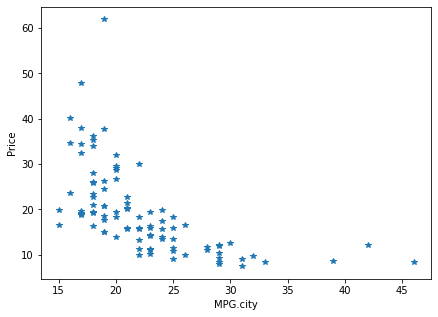

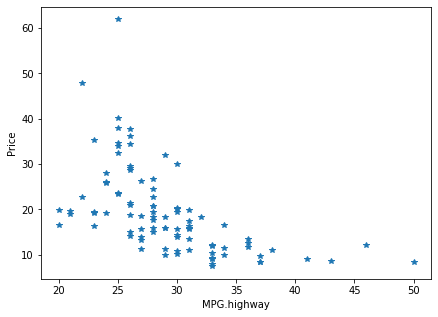

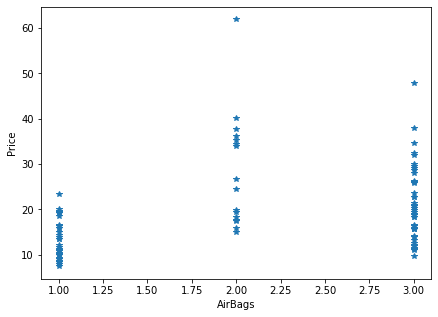

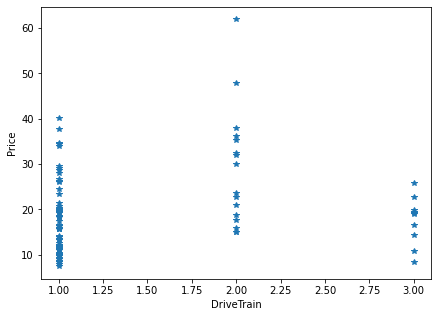

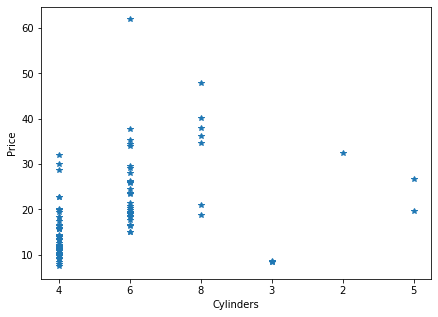

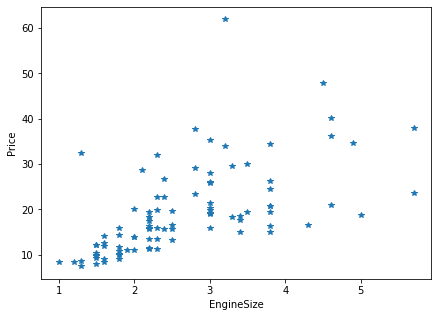

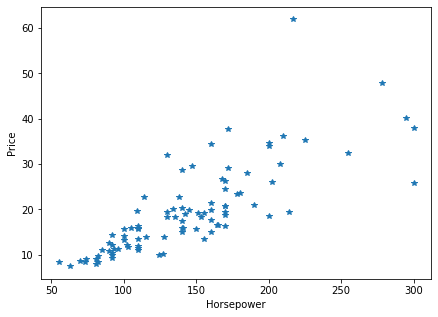

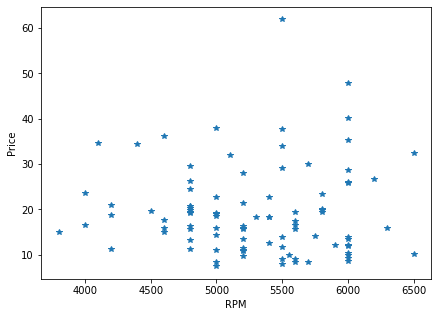

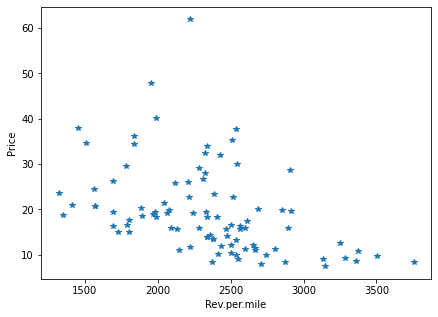

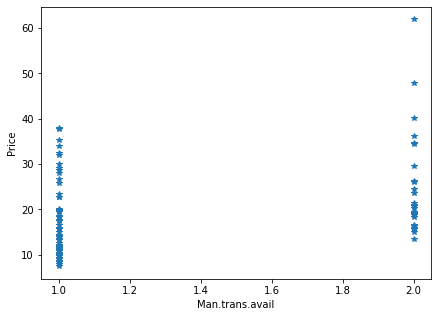

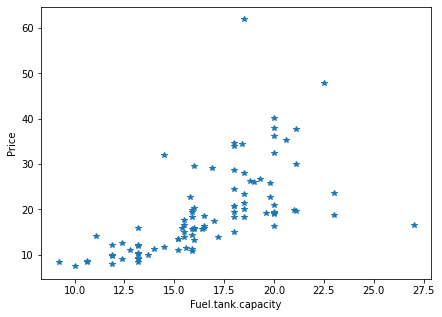

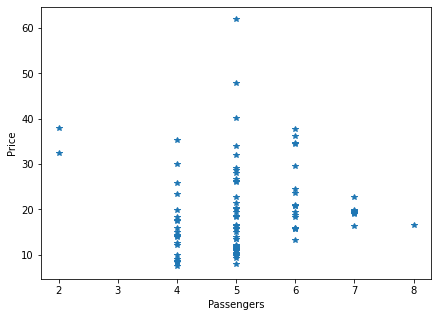

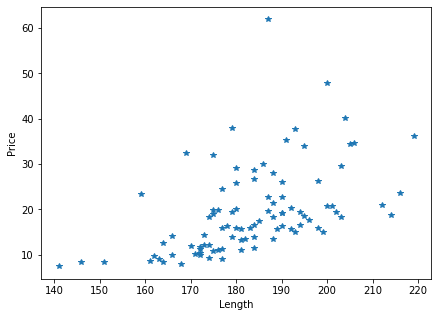

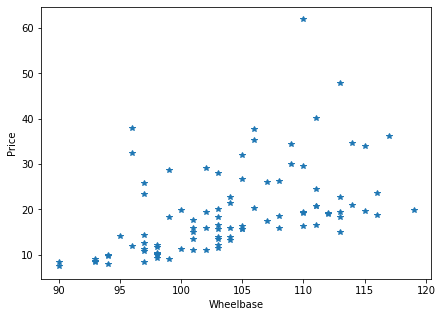

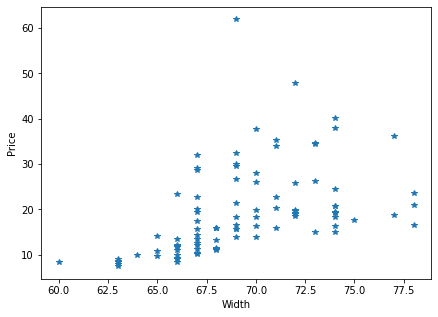

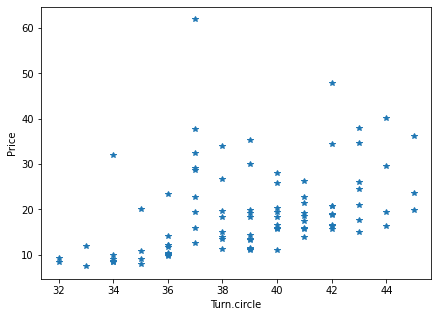

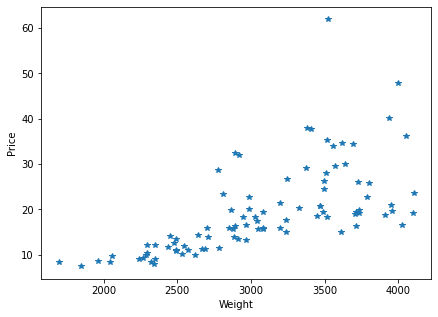

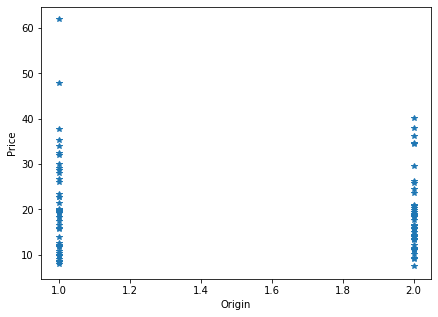

In [18]:
for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[k],data[y],'*')
  plt.xlabel(k)
  plt.ylabel('Price')
  plt.show()

Lo volveremos un problema binario, es decir, si un carro es costoso o económico. Se define entonces que si un carro tiene un precio mayor a 20 es costoso y, de lo contrario, es económico.

In [19]:
bin = np.array(data[y])

In [20]:
bin[bin<20]=0   #económico
bin[bin>=20]=1  #costoso

In [21]:
print(np.unique(bin,return_counts=True))

(array([0., 1.]), array([61, 32]))


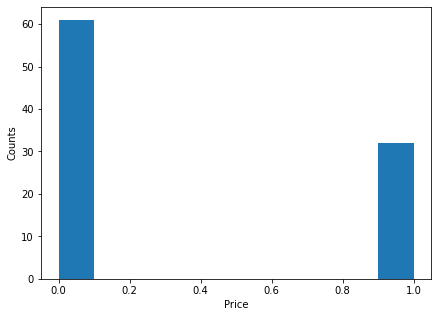

In [22]:
fig = plt.figure(figsize=(7,5))
plt.hist(bin)
plt.xlabel('Price')
plt.ylabel('Counts')
plt.show()

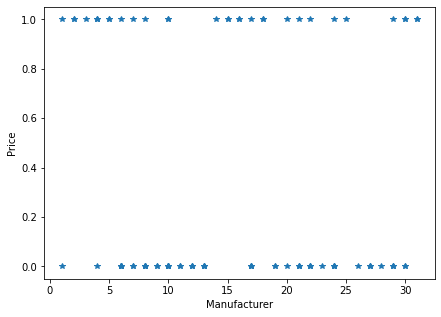

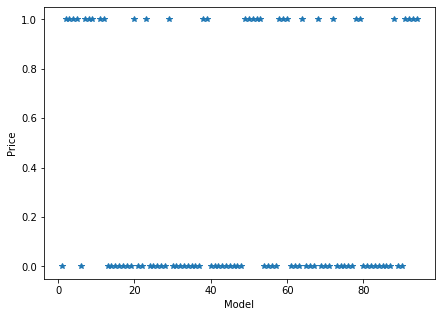

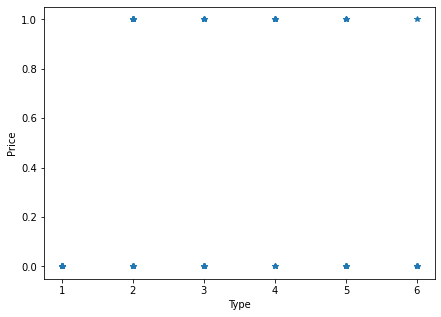

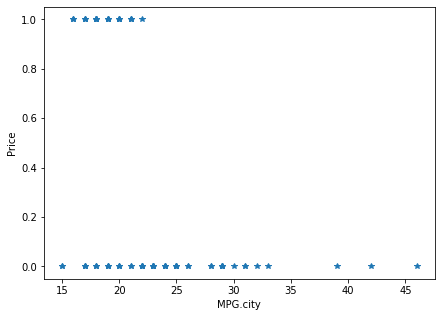

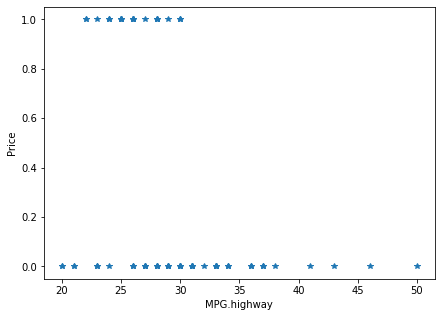

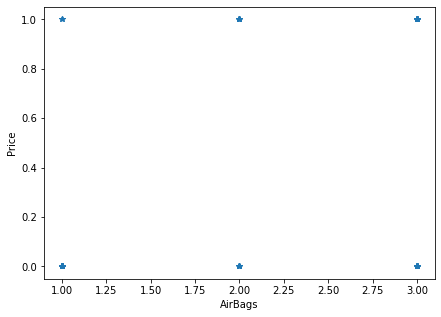

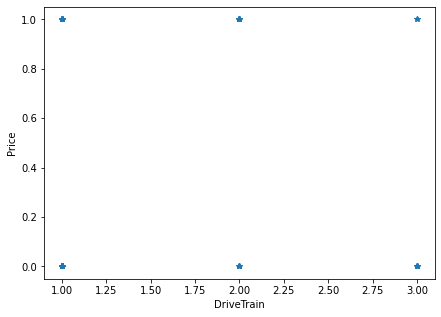

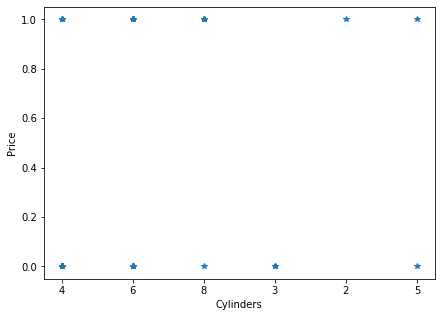

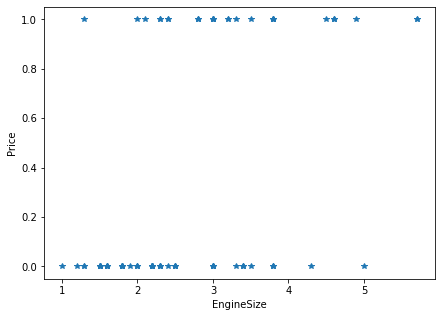

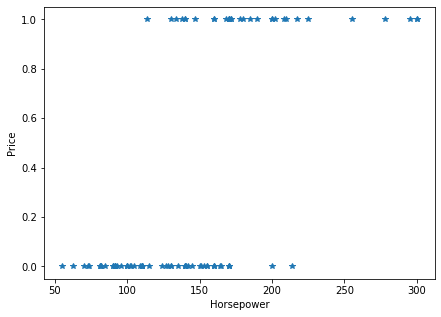

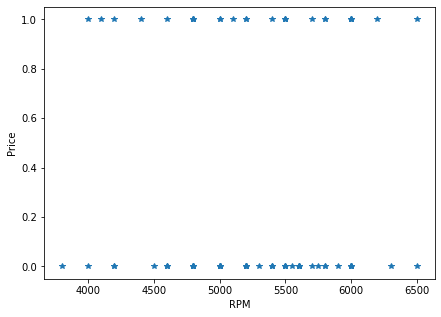

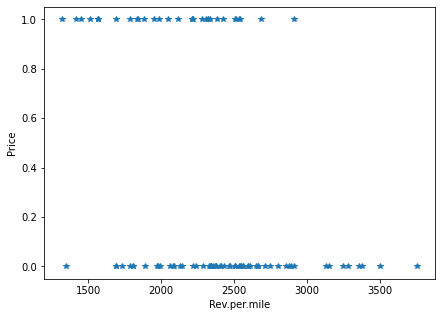

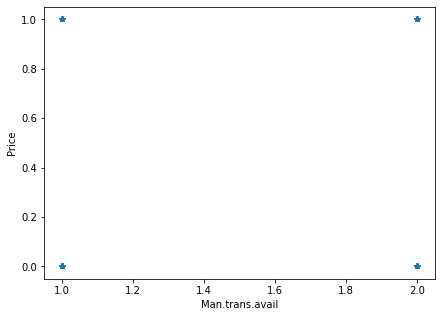

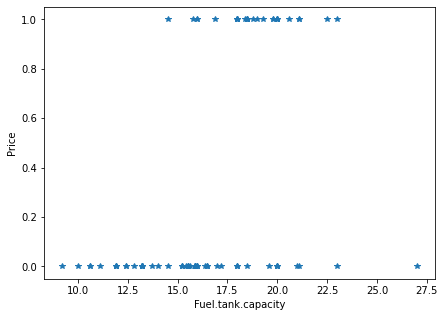

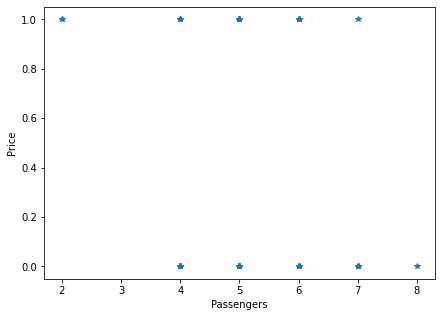

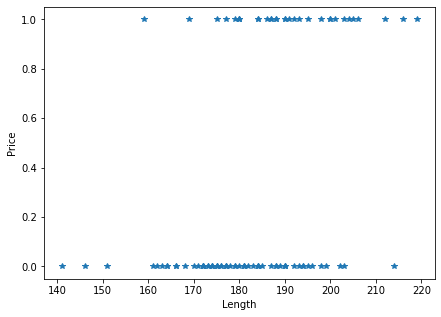

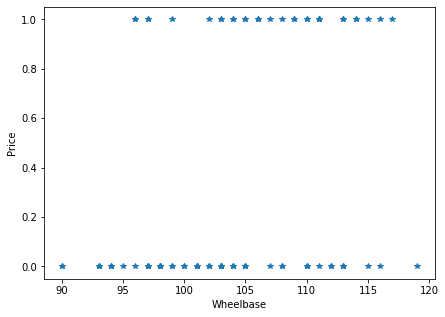

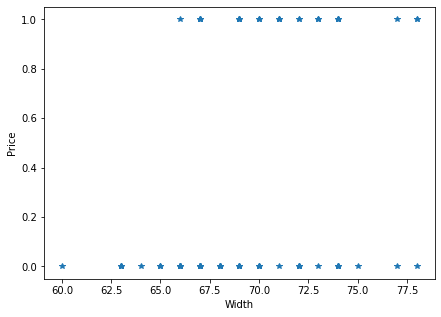

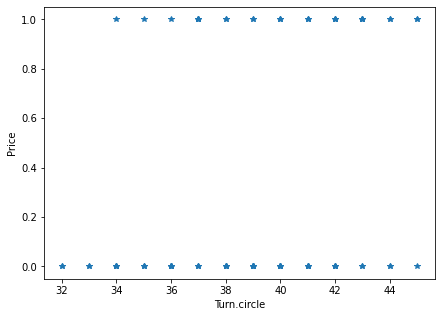

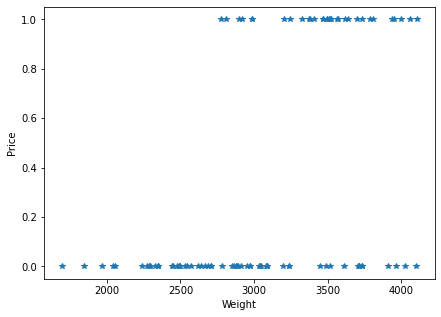

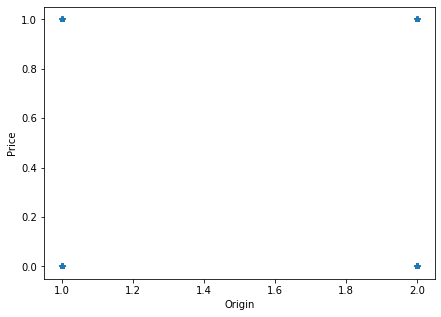

In [23]:
for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[k],bin,'*')
  plt.xlabel(k)
  plt.ylabel('Price')
  plt.show()

In [24]:
keys2= ['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower','Rev.per.mile','Fuel.tank.capacity',  'Length', 'Weight', ]


De acuerdo a las gráficas anteriores, los más significativos serían el peso, la longitud, la capacidad del tanque, las rev. por milla, los caballos de fuerza, el tamaño del motor, los MPG en la autopista, los MPG en la ciudad.

In [25]:
data_scaled =  ss().fit_transform(data[keys2])

In [26]:
model = RandomForestClassifier()
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
X_train , X_test, Y_train, Y_test = train_test_split(data_scaled, bin)
np.shape(data_scaled), np.shape(X_train), np.shape(X_test)

((93, 8), (69, 8), (24, 8))

In [28]:
# Split train/valid/test

from sklearn.model_selection import train_test_split

X_train , X_test, Y_train, Y_test = train_test_split(data_scaled, bin)
np.shape(data_scaled), np.shape(X_train), np.shape(X_test)

((93, 8), (69, 8), (24, 8))

In [29]:
model = RandomForestClassifier(n_estimators=100, max_depth=10)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
Y_pred = model.predict(X_test)
Y_pred

array([0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0.])

In [32]:
# Veremos si es buena o mala. El parámetro más común de evaluación es Accuracy

sum=0
for i in range(len(Y_test)):
  if Y_test[i][0] == Y_pred[i]:
    sum+=1
print(sum/(len(Y_test)))

0.7083333333333334


Se verificó que al aumentar la división existente entre un carro económico y uno costoso, la probabilidad de que el algoritmo identificara de manera correcta el carro, aumentaba. Esto se daba porque la mayoría de los carros era de bajo precio y no se podía garantizar un entrenamiento adecuado del algoritmo.